In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from itertools import product
import numpy as np

# Register matplotlib converters to properly handle datetime objects in plots
register_matplotlib_converters()
# Set the style for seaborn plots
sns.set(style="whitegrid")

from src.trade_analyzer import TradeAnalyser

# Analyse the last file of data


Handling Missing Values:
No missing values found.

Descriptive Statistics:
          OpenTradeDatetime   CloseTradeDatetime CodeName     Balance  \
count                   225                  225      225  225.000000   
unique                  225                  225       11         NaN   
top     13/06/2023 03:20:16  13/06/2023 04:34:24       SH         NaN   
freq                      1                    1       58         NaN   
mean                    NaN                  NaN      NaN    9.588889   
std                     NaN                  NaN      NaN   25.960841   
min                     NaN                  NaN      NaN  -17.500000   
25%                     NaN                  NaN      NaN  -10.000000   
50%                     NaN                  NaN      NaN    0.000000   
75%                     NaN                  NaN      NaN   22.500000   
max                     NaN                  NaN      NaN  140.000000   

        MaxBalance      Length IsLong    EntryP

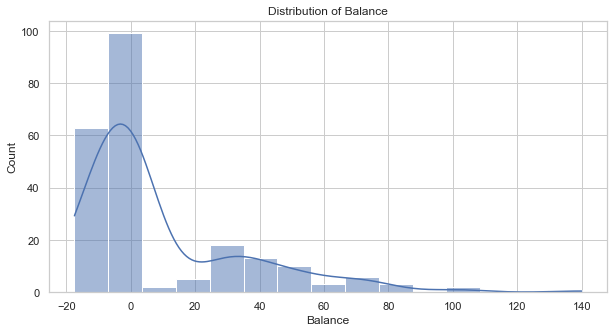

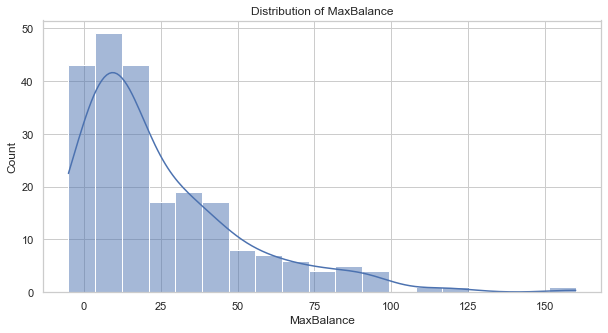

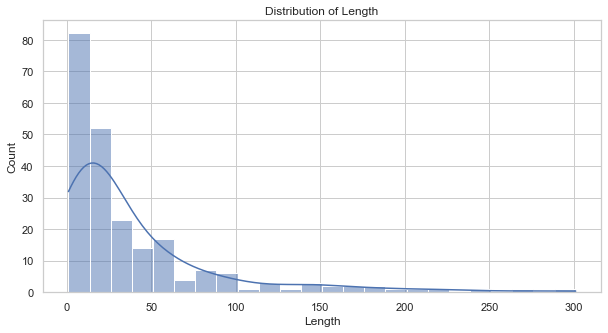

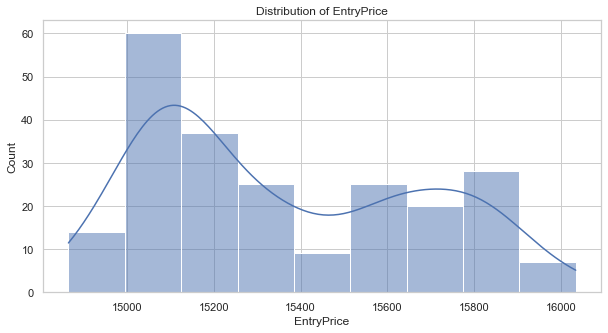


Balance Distribution per CodeName:


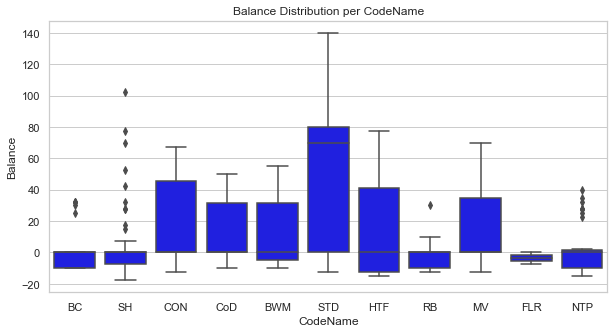


CDF of Balance per CodeName:



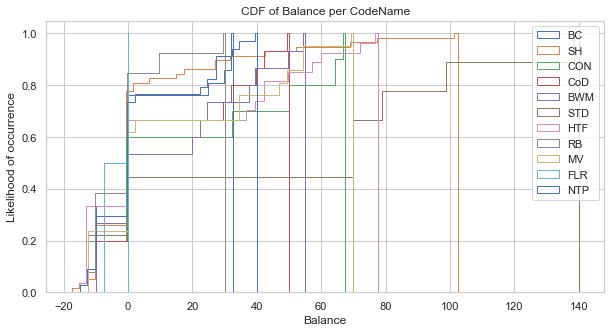


Empirical Distribution of Balance per CodeName:



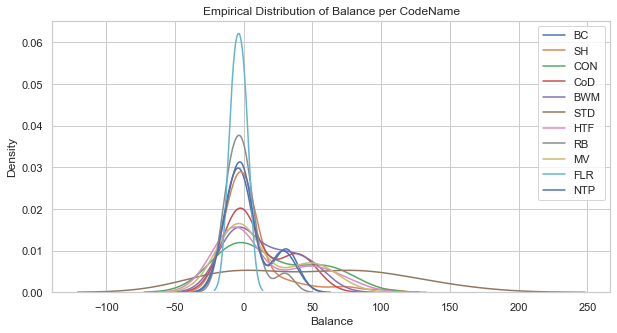


Performance Analysis of each CodeName:



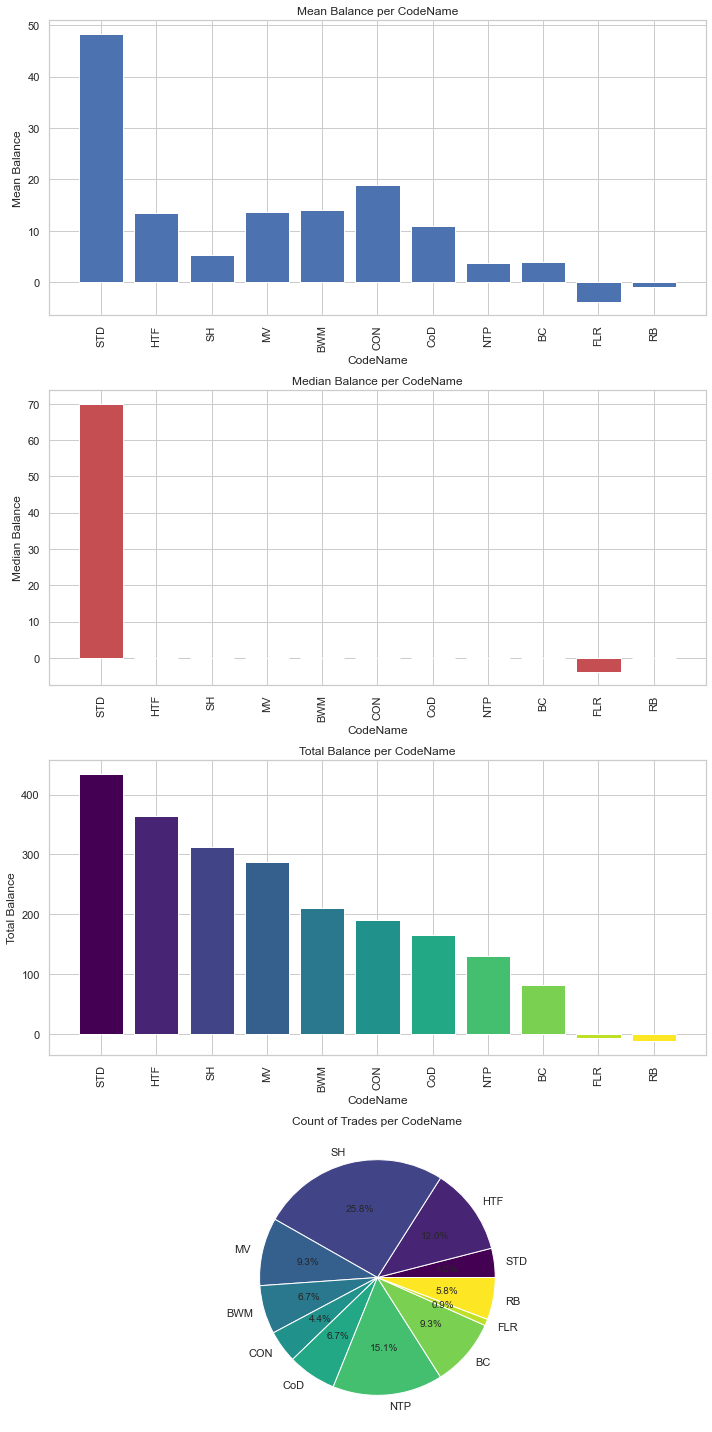


Empirical Distribution of Balance per CodeName and Month:



c:\projects\the-ai-jungle\the-ai-jungle\trading-stats\src\trade_analyzer.py:280: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(year_month_subset['Balance'], ax=axes[j, i], color=color_dict[codename])
c:\projects\the-ai-jungle\the-ai-jungle\trading-stats\src\trade_analyzer.py:280: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(year_month_subset['Balance'], ax=axes[j, i], color=color_dict[codename])


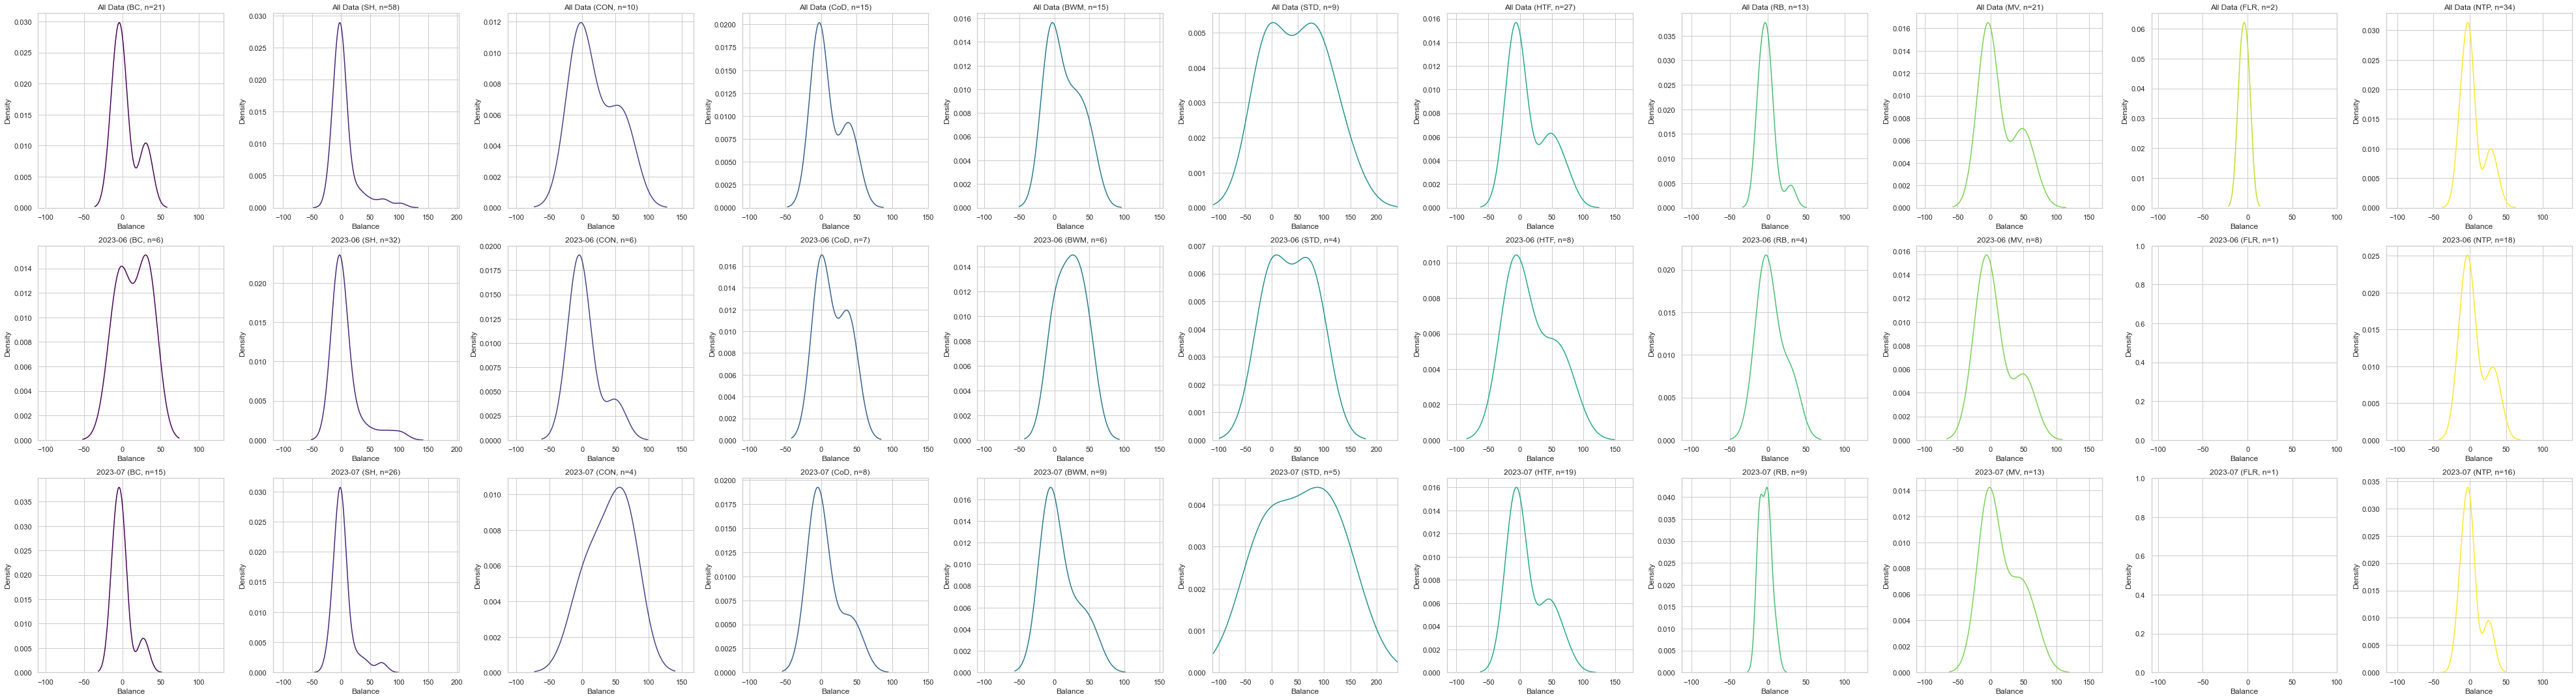

In [3]:
df = pd.read_csv("data/Stats.csv", sep=';')
df.drop('ExitPrice', axis=1, inplace=True)
df.head()

# Define the columns
numerical_columns = ['Balance', 'MaxBalance', 'Length', 'EntryPrice']
categorical_columns = ['CodeName', 'IsLong']
time_column = 'OpenTradeDatetime'

# Create an instance of AdvancedDatasetAnalyzer
analyzer = TradeAnalyser(df, numerical_columns, categorical_columns, time_column)

# Specify which analyses to perform
analyses_config = {
    "handle_outliers"                               : False,
    "correlation_analysis"                          : False,
    "time_series_analysis"                          : False,
    "handle_missing_values"                         : True,
    "descriptive_statistics"                        : True,
    "distribution_variables"                        : True,
    "balance_per_codeName"                          : True,
    "balance_cdf_per_codename"                      : True,
    "empirical_distribution_per_codename"           : True,
    "codename_performance_analysis"                 : True,
    "empirical_distribution_per_codename_full"      : True
}

# Run the analyze function
analyzer.analyze(analyses_config, missing_values_strategy='mean')
